####Предобработка


In [ ]:
'''
data['Сумма транзакций до выдачи кредита'] = 0
data['Средняя стоимость транзакции до выдачи кредита'] = 0
data['Минимальная стоимость транзакции до выдачи кредита'] = 0
data['Максимальная стоимость транзакции до выдачи кредита'] = 0
data['Количество транзакций до выдачи кредита'] = 0
'''
operation_types = transactions_data['Тип операции'].unique()
money_types = transactions_data['Валюта платежной системы'].unique()
business_types = transactions_data['Бизнес-тип операции'].unique()
card_types = transactions_data['Тип карты'].unique()
print(operation_types, money_types, business_types, card_types)

#for type_ in operation_types:
#  data[type_ + ' - count'] = 0
'''
for money_type in money_types:
  data[money_type + ' - summ'] = 0
for business_type in business_types:
  data[business_type + ' - summ'] = 0
for card_type in card_types:
  data[card_type + ' - summ'] = 0

data['Кредитовая карта - summ'] = 0
data['Овердрафт - summ'] = 0
'''
#data = data.drop(labels=['SVC_CLSS_ID - count', 'SETL_CCY_ID - summ', 'Card_Type - summ'], axis='columns')
data = data.drop(labels=['TXN_OPRN_TP_ID - summ'], axis='columns')




transactions_data['Дата транзакции'] = transactions_data['Дата транзакции'].astype(str)
i = 0
for row in data.iterrows():
  row = row[1]
  id = row['ID (Идентификатор Заявки)']
  client_id = row['ID (Идентификатор Клиента)']
  date = row['Дата заявки']

  transactions = transactions_data[(transactions_data['Идентификатор Клиента'] == client_id) & (transactions_data['Дата транзакции'] < str(date))]
  #=======================================================Part 1===============================================================================
  data.loc[i, 'Сумма транзакций до выдачи кредита'] = transactions['Сумма транзакции'].sum()
  data.loc[i, 'Минимальная стоимость транзакции до выдачи кредита'] = transactions['Сумма транзакции'].min()
  data.loc[i, 'Максимальная стоимость транзакции до выдачи кредита'] = transactions['Сумма транзакции'].max()
  data.loc[i, 'Средняя стоимость транзакции до выдачи кредита'] = transactions['Сумма транзакции'].mean()
  data.loc[i, 'Количество транзакций до выдачи кредита'] = len(transactions['Сумма транзакции'])
  #=============================================================================================================================================

  #=======================================================Part 2================================================================================
  data.loc[i, 'Transaction - count'] = len(transactions[transactions['Тип операции'] == 'Transaction'])
  data.loc[i, 'Misc - count'] = len(transactions[transactions['Тип операции'] == 'Misc'])

  #print(transactions[transactions['Валюта платежной системы'] == 'Russian Ruble']['Сумма транзакции'].sum())
  data.loc[i, 'Russian Ruble - summ'] = transactions[transactions['Валюта платежной системы'] == 'Russian Ruble']['Сумма транзакции'].sum()
  data.loc[i, 'Не определено в системе - summ'] = transactions[transactions['Валюта платежной системы'] == 'Не определено в системе']['Сумма транзакции'].sum()
  data.loc[i, 'US Dollar - summ'] = transactions[transactions['Валюта платежной системы'] == 'US Dollar']['Сумма транзакции'].sum()
  data.loc[i, 'EURO - summ'] = transactions[transactions['Валюта платежной системы'] == 'EURO']['Сумма транзакции'].sum()

  #=============================================================================================================================================

  #========================================================Part 3=================================================================================
  data.loc[i, 'Оплата через Госуслуги - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Оплата через Госуслуги']['Сумма транзакции'].sum()
  data.loc[i, 'Покупка в ТСП через чужой POS - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Покупка в ТСП через чужой POS']['Сумма транзакции'].sum()
  data.loc[i, 'Зачисление субсидии на счетовой контракт - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Зачисление субсидии на счетовой контракт']['Сумма транзакции'].sum()
  data.loc[i, 'Прочее - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Прочее']['Сумма транзакции'].sum()
  data.loc[i, 'Перевод от клиента АББ НЕ клиенту АББ через АБО - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Перевод от клиента АББ НЕ клиенту АББ через АБО']['Сумма транзакции'].sum()
  data.loc[i, 'Оплата через Госуслуги РТ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Оплата через Госуслуги РТ']['Сумма транзакции'].sum()
  data.loc[i, 'Зачисление средств на карточный счет через АТМ АББ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Зачисление средств на карточный счет через АТМ АББ']['Сумма транзакции'].sum()
  data.loc[i, 'Зачисление средств на карточный счет через инфокиоск АББ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Зачисление средств на карточный счет через инфокиоск АББ']['Сумма транзакции'].sum()
  data.loc[i, 'Покупка в ТСП через POS АББ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Покупка в ТСП через POS АББ']['Сумма транзакции'].sum()
  data.loc[i, 'Снятие средств с карточного счета через АТМ АББ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Снятие средств с карточного счета через АТМ АББ']['Сумма транзакции'].sum()
  data.loc[i, 'Зачисление ЗПК на счетовой контракт - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Зачисление ЗПК на счетовой контракт']['Сумма транзакции'].sum()
  data.loc[i, 'Перевод от клиента АББ клиенту АББ через АБО - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Перевод от клиента АББ клиенту АББ через АБО']['Сумма транзакции'].sum()
  data.loc[i, 'Перевод на свою карту через АБО - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Перевод на свою карту через АБО']['Сумма транзакции'].sum()
  data.loc[i, 'Снятие средств с карточного счета через чужой АТМ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Снятие средств с карточного счета через чужой АТМ']['Сумма транзакции'].sum()
  data.loc[i, 'Перевод от клиента АББ клиенту АББ через АТМ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Перевод от клиента АББ клиенту АББ через АТМ']['Сумма транзакции'].sum()
  data.loc[i, 'Перевод на свою карту через АТМ АББ - summ'] = transactions[transactions['Бизнес-тип операции'] == 'Перевод на свою карту через АТМ АББ']['Сумма транзакции'].sum()
  #===============================================================================================================================================

  #==========================================================Part 4===============================================================================
  data.loc[i, 'Дебетовая карта - summ'] = transactions[transactions['Тип карты'] == 'Дебетовая карта']['Сумма транзакции'].sum()
  data.loc[i, 'Кредитовая карта - summ'] = transactions[transactions['Тип карты'] == 'Кредитовая карта']['Сумма транзакции'].sum()
  data.loc[i, 'Овердрафт - summ'] = transactions[transactions['Тип карты'] == 'Овердрафт']['Сумма транзакции'].sum()
  data.loc[i, 'Не определено в системе - summ'] = transactions[transactions['Тип карты'] == 'Не определено в системе']['Сумма транзакции'].sum()

  #===============================================================================================================================================

  
  i +=1
  
data['К-во кредитов закрытых ранее'] = 0
data['К-во кредитов не закрытых ранее'] = 0




In [152]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ID (Идентификатор Заявки),ID (Идентификатор Клиента),Дата заявки,Target (90 mob 12),Сумма транзакций до выдачи кредита,Средняя стоимость транзакции до выдачи кредита,Минимальная стоимость транзакции до выдачи кредита,Максимальная стоимость транзакции до выдачи кредита,Количество транзакций до выдачи кредита,Transaction - count,Misc - count,Russian Ruble - summ,Не определено в системе - summ,US Dollar - summ,EURO - summ,Оплата через Госуслуги - summ,Покупка в ТСП через чужой POS - summ,Зачисление субсидии на счетовой контракт - summ,Прочее - summ,Перевод от клиента АББ НЕ клиенту АББ через АБО - summ,Оплата через Госуслуги РТ - summ,Зачисление средств на карточный счет через АТМ АББ - summ,Зачисление средств на карточный счет через инфокиоск АББ - summ,Покупка в ТСП через POS АББ - summ,Снятие средств с карточного счета через АТМ АББ - summ,Зачисление ЗПК на счетовой контракт - summ,Перевод от клиента АББ клиенту АББ через АБО - summ,Перевод на свою карту через АБО - summ,Снятие средств с карточного счета через чужой АТМ - summ,Перевод от клиента АББ клиенту АББ через АТМ - summ,Перевод на свою карту через АТМ АББ - summ,Дебетовая карта - summ,Кредитовая карта - summ,Овердрафт - summ,Не определено в системе - summ,К-во кредитов закрытых ранее,К-во кредитов не закрытых ранее
0,0,0,N_0003,ID_0044,2018-03-12,0,43605.97,1245.884857,0.0,10000.00,35,31,4,43605.97,0,0.0,0.0,0.0,9315.97,0,34290.00,0,0.0,0,0,0.00,0,0.0,0.0,0.0,0.0,0,0.0,33215.97,0.0,0.0,0,0,0
1,1,1,N_0006,ID_0553,2018-06-14,0,400168.39,3923.219510,0.0,29000.00,102,96,6,400168.39,0,0.0,0.0,0.0,23166.62,0,210532.01,0,0.0,0,0,569.76,140400,0.0,0.0,0.0,0.0,25500,0.0,371196.38,0.0,0.0,0,0,0
2,2,2,N_0007,ID_1333,2018-06-29,0,1681463.09,8407.315450,0.0,70694.96,200,198,2,1681463.09,0,0.0,0.0,0.0,4522.00,0,840478.10,0,0.0,0,0,28162.99,808300,0.0,0.0,0.0,0.0,0,0.0,1681463.09,0.0,0.0,0,0,0
3,3,3,N_0008,ID_0423,2018-02-19,0,535428.36,3995.734030,0.0,17617.00,134,120,14,535428.36,0,0.0,0.0,1010.0,50596.49,0,272938.35,0,12001.4,0,0,10882.12,188000,0.0,0.0,0.0,0.0,0,0.0,535428.36,0.0,0.0,0,0,0
4,4,4,N_0009,ID_0918,2018-04-11,0,203475.00,11969.117647,49.0,21400.00,17,17,0,203475.00,0,0.0,0.0,0.0,0.00,0,99226.00,0,0.0,0,0,49.00,104200,0.0,0.0,0.0,0.0,0,0.0,203475.00,0.0,0.0,0,0,0


In [154]:
i = 0
for row in data.iterrows():
  row = row[1]
  id = row['ID (Идентификатор Заявки)']
  client_id = row['ID (Идентификатор Клиента)']
  date = row['Дата заявки']

  credits_list = data[(data['ID (Идентификатор Клиента)'] == client_id) & (data['Дата заявки'] < str(date))]
  data.loc[i, 'К-во кредитов не закрытых ранее'] = credits_list['Target (90 mob 12)'].sum()
  data.loc[i, 'К-во кредитов закрытых ранее'] = (credits_list.shape[0] - credits_list['Target (90 mob 12)'].sum() > 0)
  #print(credits_list)
  #=======================================================Part 1===============================================================================
  #data.loc[i, 'Сумма транзакций до выдачи кредита'] = transactions['Сумма транзакции'].sum()
  
  i +=1


In [157]:
data[data['К-во кредитов не закрытых ранее'] != 0]

,Unnamed: 0,Unnamed: 0.1,ID (Идентификатор Заявки),ID (Идентификатор Клиента),Дата заявки,Target (90 mob 12),Сумма транзакций до выдачи кредита,Средняя стоимость транзакции до выдачи кредита,Минимальная стоимость транзакции до выдачи кредита,Максимальная стоимость транзакции до выдачи кредита,Количество транзакций до выдачи кредита,Transaction - count,Misc - count,Russian Ruble - summ,Не определено в системе - summ,US Dollar - summ,EURO - summ,Оплата через Госуслуги - summ,Покупка в ТСП через чужой POS - summ,Зачисление субсидии на счетовой контракт - summ,Прочее - summ,Перевод от клиента АББ НЕ клиенту АББ через АБО - summ,Оплата через Госуслуги РТ - summ,Зачисление средств на карточный счет через АТМ АББ - summ,Зачисление средств на карточный счет через инфокиоск АББ - summ,Покупка в ТСП через POS АББ - summ,Снятие средств с карточного счета через АТМ АББ - summ,Зачисление ЗПК на счетовой контракт - summ,Перевод от клиента АББ клиенту АББ через АБО - summ,Перевод на свою карту через АБО - summ,Снятие средств с карточного счета через чужой АТМ - summ,Перевод от клиента АББ клиенту АББ через АТМ - summ,Перевод на свою карту через АТМ АББ - summ,Дебетовая карта - summ,Кредитовая карта - summ,Овердрафт - summ,Не определено в системе - summ,К-во кредитов закрытых ранее,К-во кредитов не закрытых ранее
560,560,560,N_0694,ID_0045,2018-10-16,1,563813.0,5582.306931,0.0,150000.0,101,78,23,563813.0,0,0.0,0.0,0.0,23294.0,0,320219.0,0,0.0,18900,0,0.0,201000,0.0,0.0,0.0,400.0,0,0.0,270494.0,0.0,0.0,0,0,1


In [158]:
data.to_excel('result.xlsx')

###Data analytics and feature agregation

In [2]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
import os
os.chdir('gdrive/My Drive/hakaton/hack_data/2')



FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'gdrive/My Drive/hakaton/hack_data/2'

In [4]:
data = pd.read_excel('result.xlsx')

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ID (Идентификатор Заявки),ID (Идентификатор Клиента),Дата заявки,Target (90 mob 12),Сумма транзакций до выдачи кредита,Средняя стоимость транзакции до выдачи кредита,Минимальная стоимость транзакции до выдачи кредита,Максимальная стоимость транзакции до выдачи кредита,...,Зачисление ЗПК на счетовой контракт - summ,Перевод от клиента АББ клиенту АББ через АБО - summ,Перевод на свою карту через АБО - summ,Снятие средств с карточного счета через чужой АТМ - summ,Перевод от клиента АББ клиенту АББ через АТМ - summ,Перевод на свою карту через АТМ АББ - summ,Дебетовая карта - summ,Кредитовая карта - summ,Овердрафт - summ,Не определено в системе - summ
0,0,0,N_0003,ID_0044,2018-03-12,0,43605.97,1245.884857,0.0,10000.00,...,0.0,0.0,0.0,0.0,0,0.0,33215.97,0.0,0.0,0
1,1,1,N_0006,ID_0553,2018-06-14,0,400168.39,3923.219510,0.0,29000.00,...,0.0,0.0,0.0,0.0,25500,0.0,371196.38,0.0,0.0,0
2,2,2,N_0007,ID_1333,2018-06-29,0,1681463.09,8407.315450,0.0,70694.96,...,0.0,0.0,0.0,0.0,0,0.0,1681463.09,0.0,0.0,0
3,3,3,N_0008,ID_0423,2018-02-19,0,535428.36,3995.734030,0.0,17617.00,...,0.0,0.0,0.0,0.0,0,0.0,535428.36,0.0,0.0,0
4,4,4,N_0009,ID_0918,2018-04-11,0,203475.00,11969.117647,49.0,21400.00,...,0.0,0.0,0.0,0.0,0,0.0,203475.00,0.0,0.0,0


In [6]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Target (90 mob 12),Сумма транзакций до выдачи кредита,Средняя стоимость транзакции до выдачи кредита,Минимальная стоимость транзакции до выдачи кредита,Максимальная стоимость транзакции до выдачи кредита,Количество транзакций до выдачи кредита,Transaction - count,Misc - count,...,Зачисление ЗПК на счетовой контракт - summ,Перевод от клиента АББ клиенту АББ через АБО - summ,Перевод на свою карту через АБО - summ,Снятие средств с карточного счета через чужой АТМ - summ,Перевод от клиента АББ клиенту АББ через АТМ - summ,Перевод на свою карту через АТМ АББ - summ,Дебетовая карта - summ,Кредитовая карта - summ,Овердрафт - summ,Не определено в системе - summ
count,1151.000000,1151.000000,1151.000000,1.151000e+03,1141.000000,1141.000000,1.141000e+03,1151.000000,1151.000000,1151.000000,...,1.151000e+03,1.151000e+03,1.151000e+03,1.151000e+03,1151.000000,1151.000000,1.151000e+03,1.151000e+03,1.151000e+03,1151.0
mean,575.000000,575.000000,0.014770,1.069710e+06,5059.914823,8.745372,7.644805e+04,216.257168,204.298002,11.959166,...,1.169638e+04,6.631442e+03,4.709198e+03,1.497495e+04,349.956560,374.385369,9.086608e+05,1.637416e+04,6.423140e+04,0.0
std,332.409386,332.409386,0.120683,3.443946e+06,9501.325855,203.005273,1.492627e+05,285.791456,279.643765,11.238872,...,1.165438e+05,6.808291e+04,4.290300e+04,9.395245e+04,6298.989394,9458.334606,2.658040e+06,1.353709e+05,2.106887e+06,0.0
min,0.000000,0.000000,0.000000,0.000000e+00,29.713333,0.000000,8.700000e+01,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,287.500000,287.500000,0.000000,1.211309e+05,1484.127606,0.000000,1.262452e+04,52.500000,43.000000,3.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.067526e+05,0.000000e+00,0.000000e+00,0.0
50%,575.000000,575.000000,0.000000,3.893091e+05,2827.379185,0.000000,3.000000e+04,111.000000,101.000000,9.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3.147654e+05,0.000000e+00,0.000000e+00,0.0
75%,862.500000,862.500000,0.000000,8.281739e+05,5716.608116,0.000000,8.000000e+04,258.500000,245.500000,18.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+02,0.000000,0.000000,7.013619e+05,0.000000e+00,0.000000e+00,0.0
max,1150.000000,1150.000000,1.000000,7.190943e+07,213375.955314,6800.000000,3.000000e+06,2225.000000,2202.000000,108.000000,...,3.186100e+06,1.481794e+06,1.228280e+06,2.753000e+06,198000.000000,310000.000000,3.950695e+07,2.424642e+06,7.147369e+07,0.0


##Model

####Train test split

In [8]:
X = data.drop(labels=['Unnamed: 0', 'Unnamed: 0.1', 'ID (Идентификатор Заявки)', 'ID (Идентификатор Клиента)', 'Дата заявки', 'Target (90 mob 12)'], axis='columns')
y = data['Target (90 mob 12)']

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target (90 mob 12), dtype: int64

In [10]:
X.head()

,Сумма транзакций до выдачи кредита,Средняя стоимость транзакции до выдачи кредита,Минимальная стоимость транзакции до выдачи кредита,Максимальная стоимость транзакции до выдачи кредита,Количество транзакций до выдачи кредита,Transaction - count,Misc - count,Russian Ruble - summ,Не определено в системе - summ,US Dollar - summ,...,Зачисление ЗПК на счетовой контракт - summ,Перевод от клиента АББ клиенту АББ через АБО - summ,Перевод на свою карту через АБО - summ,Снятие средств с карточного счета через чужой АТМ - summ,Перевод от клиента АББ клиенту АББ через АТМ - summ,Перевод на свою карту через АТМ АББ - summ,Дебетовая карта - summ,Кредитовая карта - summ,Овердрафт - summ,Не определено в системе - summ
0,43605.97,1245.884857,0.0,10000.00,35,31,4,43605.97,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,33215.97,0.0,0.0,0
1,400168.39,3923.219510,0.0,29000.00,102,96,6,400168.39,0,0.0,...,0.0,0.0,0.0,0.0,25500,0.0,371196.38,0.0,0.0,0
2,1681463.09,8407.315450,0.0,70694.96,200,198,2,1681463.09,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,1681463.09,0.0,0.0,0
3,535428.36,3995.734030,0.0,17617.00,134,120,14,535428.36,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,535428.36,0.0,0.0,0
4,203475.00,11969.117647,49.0,21400.00,17,17,0,203475.00,0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,203475.00,0.0,0.0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
import numpy as np

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, stratify=y)

In [60]:
print(y_train.sum(), len(y_train))

12 805


In [61]:
print(X_train.dtypes)
#categorical_features_indices = np.where(X.dtypes != np.float)[0]

Сумма транзакций до выдачи кредита                                 float64
Средняя стоимость транзакции до выдачи кредита                     float64
Минимальная стоимость транзакции до выдачи кредита                 float64
Максимальная стоимость транзакции до выдачи кредита                float64
Количество транзакций до выдачи кредита                              int64
Transaction - count                                                  int64
Misc - count                                                         int64
Russian Ruble - summ                                               float64
 Не определено в системе - summ                                      int64
US Dollar - summ                                                   float64
EURO - summ                                                        float64
Оплата через Госуслуги - summ                                      float64
Покупка в ТСП через чужой POS - summ                               float64
Зачисление субсидии на сч

In [62]:
print(X_val.shape, y_val.shape)

(346, 31) (346,)


In [63]:
print(X_train.shape, y_train.shape)

(805, 31) (805,)


####Catboost

In [65]:
from catboost import CatBoostClassifier

In [67]:
X_train.shape

(805, 31)

In [93]:
categorical_features_indices = []

In [109]:
model1 = CatBoostClassifier(
   thread_count=2,
   iterations=50,
   depth=1,
   l2_leaf_reg = 2, 
   learning_rate = 0.001,
   random_seed=62,
   od_type='Iter',
   od_wait=10,
   custom_loss=[ 'F1', 'AUC'],
   auto_class_weights='Balanced',
   use_best_model=True,
)

In [110]:
model1.fit(
   X_train, y_train,
   cat_features=categorical_features_indices,
   eval_set=(X_val, y_val),
   logging_level='Silent',
   plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
model1.save_model('model.bkp')

In [106]:
model1.tree_count_

31

In [30]:
print(model1.get_best_score())

{'learn': {'F1': 0.994357366987084, 'Logloss': 0.6224722421305171}, 'validation': {'F1': 0.7562464308971664, 'Logloss': 0.686594470387322, 'AUC': 0.692375366568915}}


In [20]:
model1.

<bound method CatBoost.plot_partial_dependence of <catboost.core.CatBoostClassifier object at 0x7f9316af59e8>>

In [336]:
print(model1.tree_count_)

9


####Интерпретация модели с Shap Values:

In [337]:
!pip install shap

In [218]:
import shap
shap.initjs()

In [219]:
import catboost

In [220]:
!npm install -g --unsafe-perm ijavascript
!ijsinstall --install=global
!jupyter-kernelspec list

/tools/node/bin/ijs -> /tools/node/lib/node_modules/ijavascript/bin/ijavascript.js
/tools/node/bin/ijsconsole -> /tools/node/lib/node_modules/ijavascript/bin/ijsconsole.js
/tools/node/bin/ijsinstall -> /tools/node/lib/node_modules/ijavascript/bin/ijsinstall.js
/tools/node/bin/ijskernel -> /tools/node/lib/node_modules/ijavascript/lib/kernel.js
/tools/node/bin/ijsnotebook -> /tools/node/lib/node_modules/ijavascript/bin/ijsnotebook.js
+ ijavascript@5.2.0
updated 1 package in 1.846s
Available kernels:
  ir            /usr/local/share/jupyter/kernels/ir
  javascript    /usr/local/share/jupyter/kernels/javascript
  python2       /usr/local/share/jupyter/kernels/python2
  python3       /usr/local/share/jupyter/kernels/python3
  swift         /usr/local/share/jupyter/kernels/swift


In [221]:
shap_values = model1.get_feature_importance(catboost.Pool(X_train, y_train, cat_features=categorical_features_indices), type='ShapValues', shap_calc_type='Regular')

In [222]:
#shap_values[0]
from sklearn.metrics import f1_score
from catboost import Pool

In [338]:
print(y_val[15:50])
y_pred = model1.predict(X_val[20:50])
y_pred

500     0
268     0
154     1
331     0
902     0
1033    0
1117    0
226     0
348     0
846     0
576     0
423     1
676     0
1052    0
337     0
974     0
170     0
351     0
896     0
362     0
162     0
476     0
596     0
94      0
769     0
835     0
572     0
183     0
650     0
1049    0
790     0
308     0
492     0
333     0
852     0
Name: Target (90 mob 12), dtype: int64


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [267]:
shap_values[38]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.53231982e-03,  0.00000000e+00,  0.00000000e+00, -1.86469238e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.10626646e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.87020426e-07,  0.00000000e+00, -1.45152810e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.15803086e-04])

In [327]:
shap.initjs()
pool = catboost.Pool(X_train, y_train, cat_features=categorical_features_indices)
shap_values = model1.get_feature_importance(pool, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]



# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[17,:], X.iloc[17,:])

In [328]:
categorical_features_indices

[]

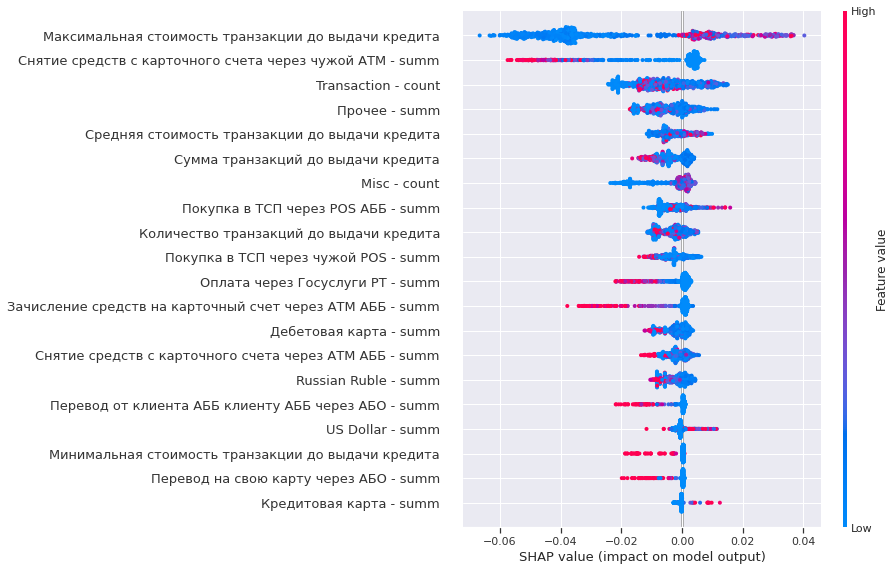

In [329]:
shap.summary_plot(shap_values, X_train)

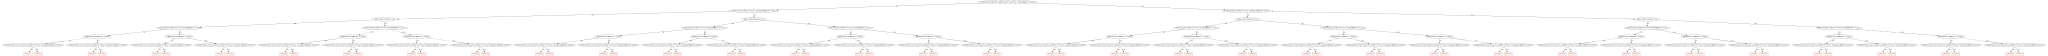

In [310]:
model1.plot_tree(tree_idx=2, pool=pool)

In [323]:
X_train = X_train.fillna(0)

In [324]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded.shape

(805, 2)

In [325]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
rc={"lines.linewidth": 2.5})
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 20))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=30,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


Mean of empty slice.
invalid value encountered in true_divide


(<Figure size 576x576 with 1 Axes>,
 [Text(-3.6542034, 2.3786993, '0'),
  Text(nan, nan, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(-11.523106, 4.3259373, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


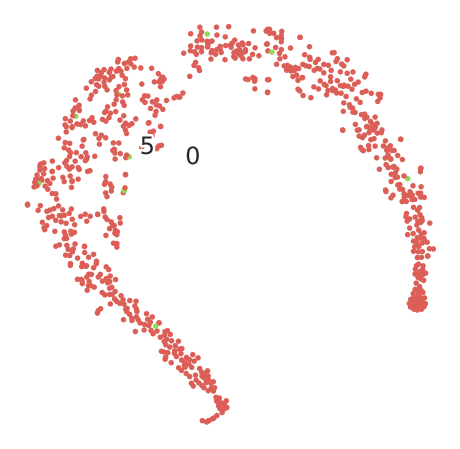

In [326]:
scatter(X_embedded, y_train * 5)